In [1]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size
#text generation apostrpphe breaking

In [1]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account
import os
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/Eis4Elephant/Desktop/key.json'

client = language.LanguageServiceClient()

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


In [3]:
import os
cwd = os.getcwd()
print (cwd)

/Users/Eis4Elephant/Documents/text_generator/Model


In [4]:
tweet_data=pd.read_csv('../Load_Tweets/data/tweet_data.csv')

In [5]:
pre_election_data=pd.read_excel('../Load_Tweets/data/Pre_election.xlsx')

In [6]:
post_election_data=pd.read_excel('../Load_Tweets/data/Post-Election.xlsx')

In [30]:
all_tweet_data=pd.read_excel('../Load_Tweets/data/Full Trump Archive.xlsx')

In [33]:
all_tweet_data.to_csv('../Load_Tweets/data/Full Trump Archive.csv')

In [11]:
analysis_df=pd.DataFrame(columns=['text', 'sentiment', 'magnitude'])

# The text to analyze

for tweet in post_election_data['text'][1188:]:
    
    text = tweet
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)


    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    d={'text':text, 'sentiment': sentiment.score, 'magnitude': sentiment.magnitude}
    analysis_df=analysis_df.append(d, ignore_index=True)
#     print('Text: {}'.format(text))
#     print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

In [12]:
# analysis_df=analysis_df.append(election_500_1021)
# analysis_df=analysis_df.reset_index(drop=True)
analysis_df

,text,sentiment,magnitude
0,We traveled the world to strengthen long-stand...,0.1,0.4
1,I will be announcing my decision on the Paris ...,0.3,0.7
2,Hopefully Republican Senators good people all ...,0.5,1.0
3,Kathy Griffin should be ashamed of herself. My...,0.0,1.2
4,...case against him &amp; now wants to clear h...,-0.1,0.7
5,So now it is reported that the Democrats who h...,-0.4,0.9
6,"Who can figure out the true meaning of ""covfef...",0.4,1.0
7,Despite the constant negative press covfefe,-0.7,0.7
8,The U.S. Senate should switch to 51 votes imme...,0.5,1.0
9,Russian officials must be laughing at the U.S....,-0.9,0.9


In [14]:
post_election_full=post_election1187.append(analysis_df)
post_election_full=post_election_full.reset_index(drop=True)

In [18]:
post_election_full=post_election_full.drop('Unnamed: 0', axis=1)

In [19]:
post_election_full.describe()

,magnitude,sentiment
count,2173.000000,2173.000000
mean,0.723930,0.050161
std,0.514323,0.403411
min,0.000000,-0.900000
25%,0.300000,-0.200000
50%,0.700000,0.100000
75%,1.000000,0.300000
max,3.000000,0.900000


In [23]:
pre_election_sentiment.describe()

,Unnamed: 0,sentiment,magnitude
count,3868.000000,3868.000000,3868.000000
mean,1933.500000,0.000801,0.654369
std,1116.739749,0.363419,0.527799
min,0.000000,-0.900000,0.000000
25%,966.750000,-0.200000,0.200000
50%,1933.500000,0.000000,0.600000
75%,2900.250000,0.200000,1.000000
max,3867.000000,0.900000,3.200000


In [26]:
pre_election_sentiment[pre_election_sentiment['sentiment'].astype('float') <(-0.85)]

,Unnamed: 0,text,sentiment,magnitude
70,70,Hillary Advisers Wanted Her To Avoid Supportin...,-0.9,0.9
75,75,So terrible that Crooked didn't report she got...,-0.9,0.9
174,174,Former Prosecutor: The Clintons Are So Corrupt...,-0.9,0.9
346,346,Can't believe these totally phoney stories 100...,-0.9,0.9
349,349,"Wow interview released by Wikileakes shows ""qu...",-0.9,0.9
366,366,The failing @nytimes reporters don't even call...,-0.9,0.9
374,374,This election is being rigged by the media pus...,-0.9,0.9
447,447,There’s never been anyone more abusive to wome...,-0.9,0.9
493,493,CLINTON’S FLAILING SYRIA POLICY WAS JUDGED A F...,-0.9,0.9
536,536,Wow Crooked Hillary was duped and used by my w...,-0.9,0.9


In [28]:
post_election_full[post_election_full['sentiment'].astype('float') <(-0.85)].count()

magnitude    48
sentiment    48
text         48
dtype: int64

In [22]:
pre_election_sentiment=pd.read_csv('../Load_Tweets/data/pre_election_sentiment.csv')

In [15]:
post_election_full.to_csv('../Load_Tweets/data/post_election_sentiment.csv')

In [47]:
tweet_text_all = tweet_data['TEXT'].str.cat(sep=' ')

In [99]:
analysis_df[analysis_df['sentiment'].astype('float') >(0.8)]

,text,sentiment,magnitude
24,Debate polls look great - thank you!#MAGA #AmericaFirst [URL],0.8,0.8
27,Thank you for all of the great comments on the debate last night. Very exciting!,0.8,1.7
39,RT @DanScavino: WE LOVE OUR DEPLORABLES!!!#TrumpTrain #Debates2016 [URL],0.8,0.8
45,"In my administration, EVERY American will be treated equally, protected equally, and honored equally #Debate #BigLeagueTruth",0.9,0.9
100,Certainly has been an interesting 24 hours!,0.8,0.8
161,".@mike_pence is doing a great job - so far, no contest!",0.9,0.9
170,"""@lainey34210: @realDonaldTrump Great opening Pence💕""",0.8,0.8
174,Here we go - Enjoy!,0.9,0.9
189,"Melania and I extend our warmest greetings to those observing Rosh Hashanah here in the United States, in Israel, and around the world.",0.8,0.8
247,Great debate poll numbers - I will be on @foxandfriends at 7:00 to discuss. Enjoy!,0.8,1.6


In [87]:
pre_election_full[pre_election_full['sentiment'].astype('float') <(-0.85)]

,text,sentiment,magnitude
70,Hillary Advisers Wanted Her To Avoid Supportin...,-0.9,0.9
75,So terrible that Crooked didn't report she got...,-0.9,0.9
174,Former Prosecutor: The Clintons Are So Corrupt...,-0.9,0.9
346,Can't believe these totally phoney stories 100...,-0.9,0.9
349,"Wow interview released by Wikileakes shows ""qu...",-0.9,0.9
366,The failing @nytimes reporters don't even call...,-0.9,0.9
374,This election is being rigged by the media pus...,-0.9,0.9
447,There’s never been anyone more abusive to wome...,-0.9,0.9
493,CLINTON’S FLAILING SYRIA POLICY WAS JUDGED A F...,-0.9,0.9
536,Wow Crooked Hillary was duped and used by my w...,-0.9,0.9


In [92]:
analysis_df['sentiment']=analysis_df['sentiment'].astype('float')
analysis_df.describe()

,sentiment,magnitude
count,692.000000,692.000000
mean,0.048121,0.593786
std,0.368215,0.484915
min,-0.900000,0.000000
25%,-0.100000,0.200000
50%,0.000000,0.500000
75%,0.300000,0.900000
max,0.900000,2.500000


In [127]:
pd.options.display.max_colwidth=1000

listofwords=pd.Series(tweet_text_all.split())
listofwords=listofwords[listofwords !='[URL]']
listofwords=listofwords[listofwords !='&amp;']
tweet_text_cleaned = listofwords.str.cat(sep=' ')

In [131]:
import six
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
def entity_sentiment_text(text):
    """Detects entity sentiment in the provided text."""

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16

    result = client.analyze_entity_sentiment(document, encoding)

    for entity in result.entities:
        print('Mentions: ')
        print(u'Name: "{}"'.format(entity.name))
        for mention in entity.mentions:
            print(u'  Begin Offset : {}'.format(mention.text.begin_offset))
            print(u'  Content : {}'.format(mention.text.content))
            print(u'  Magnitude : {}'.format(mention.sentiment.magnitude))
            print(u'  Sentiment : {}'.format(mention.sentiment.score))
            print(u'  Type : {}'.format(mention.type))
        print(u'Salience: {}'.format(entity.salience))
        print(u'Sentiment: {}\n'.format(entity.sentiment))
print (tweet_text_cleaned[0:1000])
entity_sentiment_text(tweet_text_cleaned[0:1000])



PAY TO PLAY POLITICS. #CrookedHillary Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system! Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them? Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… Join me Thursday in Florida Ohio!West Palm Beach, FL at noon:[URL]Cincinnati, OH this 7:30pm:[URL] Wow, @CNN Town Hall questions were given to Crooked Hillary Clinton in advance of big debates against Bernie Sanders. Hillary CNN FRAUD! Thank you Texas! If you haven't registered to VOTE- today is your last day. Go to: get ou… VOTER REGISTRATION DEADLINES TODAY. You can register now at: and get out to… DON'T LET HER FOOL US AGAIN. Crooked's State Dept gave special attention to "Friends of Bill" after the Haiti Earthquake. Unbelievable! RT @DonaldJTrumpJr: 13 states have voter registration deadli

In [48]:
listofwords=pd.Series(tweet_text_all.split())

In [49]:
# listofwords=list(listofwords)
# listofwords.remove('[URL]')
# listofwords.remove('I')
# listofwords.remove('&amp;')
listofwords=listofwords[listofwords !='[URL]']
listofwords=listofwords[listofwords !='&amp;']


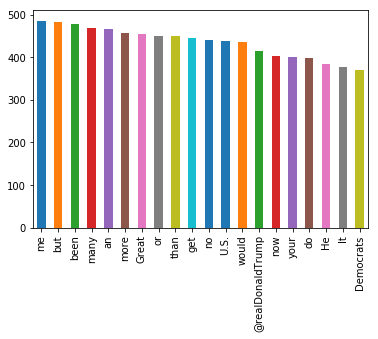

In [124]:
listofwords=pd.Series(listofwords)
top_words=listofwords.value_counts()
top_words_percent= top_words/len(listofwords)
top_words.head(30).plot.bar()
# top_words.head(50)

In [51]:
cleaned_text=listofwords.str.cat(sep=' ')
selected=top_words[50:600]
testin=selected.to_dict(dict)
type(testin)

dict

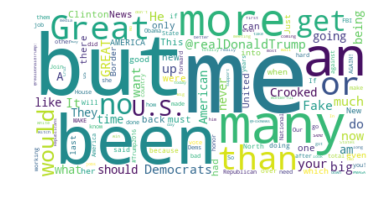

In [52]:
# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(cleaned_text)
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(testin)
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [53]:
trump_mask = np.array(Image.open('../Load_Tweets/Trump_Transparent.png'))

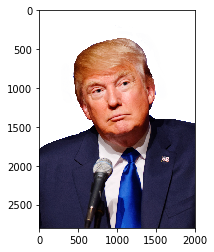

In [54]:
plt.imshow(trump_mask)

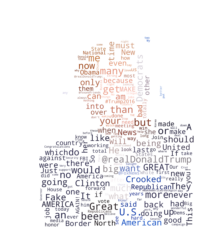

In [58]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=130, random_state=42)
wc.generate_from_frequencies(testin)

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)

# show
# fig, axes = plt.subplots(1,2 )
# # recolor wordcloud and show
# # we could also give color_func=image_colors directly in the constructor
# axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[1].imshow(trump_mask, cmap=plt.cm.gray, interpolation="bilinear")
# for ax in axes:
#     ax.set_axis_off()
# plt.show()

plt.figure(figsize=[4,4])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [101]:
import re
caps=[]
for word in listofwords:
    caps.append([i[0] for i in re.findall('(([A-Z])(?![a-z]))', word)])
newlist=[]
for lists in caps:
    if lists!=[]:
        newlist.append(lists)
strings=[]
for lists in newlist:
    strings.append(''.join(lists))

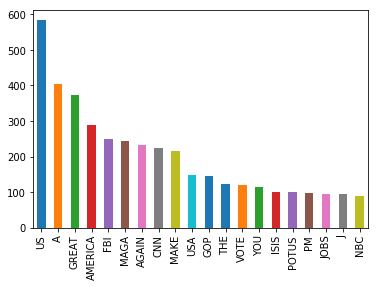

In [102]:
strings=pd.Series(strings)
top_cap_words=strings.value_counts()
top_cap_words=top_cap_words.drop(['URL', 'I', 'RT'])
top_cap_words.head(20).plot.bar()

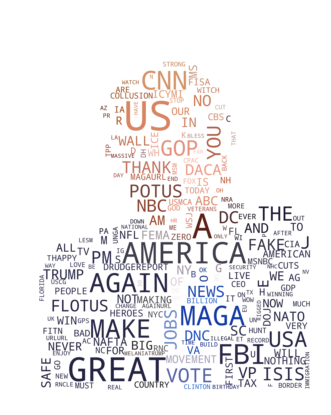

In [109]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=300, random_state=42)
wc.generate_from_frequencies(top_cap_words[:300])

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)


plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [12]:
tweet_text.head()

0          PAY TO PLAY POLITICS. #CrookedHillary [URL]
1    Very little pick-up by the dishonest media of ...
2    Crooked Hillary Clinton likes to talk about th...
3    Thank you Florida- a MOVEMENT that has never b...
4    Join me Thursday in Florida &amp; Ohio!West Pa...
Name: TEXT, dtype: object

In [17]:
total_chars=len(tweet_text_all)
total_chars
total_wordz=len((tweet_text_all.split()))
total_wordz

250988

In [13]:
chars = set(tweet_text_all)
words = set(tweet_text_all.split())
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 32293
total number of unique chars 369


In [14]:
words=list(words)

In [15]:
#replace apostrophes in dictionary keys 
for i in range (len(words)):
    words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')